In [96]:
#!pip install plotly
#!pip install cufflinks
#!pip install jupyter-dash

In [54]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()
import plotly.express as px

import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output 

Output hidden; open in https://colab.research.google.com to view.

In [55]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [56]:
property =pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/property.csv')

In [57]:
property.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [58]:
property.shape

(9, 7)

In [59]:
#setting index  to PID column
new_property = property.set_index('PID')
new_property.head()


,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,NaN,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600


In [60]:
#any null value in number of bedroom column is changed to 0 
new_property['NUM_BEDROOMS'] = new_property['NUM_BEDROOMS'].fillna(0)

In [61]:
new_property

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,0,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600
100006000.0,207.0,BERKELEY,Y,0,1,800
100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
100008000.0,213.0,TREMONT,Y,1,1,NaN
100009000.0,215.0,TREMONT,Y,na,2,1800


In [62]:
new_property.columns

Index(['ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [63]:
new_property.values

array([[104.0, 'PUTNAM', 'Y', '3', '1', '1000'],
       [197.0, 'LEXINGTON', 'N', '3', '1.5', '--'],
       [nan, 'LEXINGTON', 'N', 0, '1', '850'],
       [201.0, 'BERKELEY', '12', '1', nan, '700'],
       [203.0, 'BERKELEY', 'Y', '3', '2', '1600'],
       [207.0, 'BERKELEY', 'Y', 0, '1', '800'],
       [nan, 'WASHINGTON', nan, '2', 'HURLEY', '950'],
       [213.0, 'TREMONT', 'Y', '1', '1', nan],
       [215.0, 'TREMONT', 'Y', 'na', '2', '1800']], dtype=object)

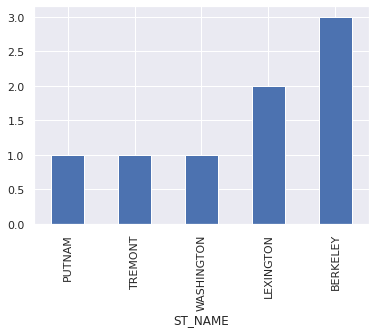

In [64]:
new_property.groupby(['ST_NAME'])['SQ_FT'].count().sort_values(ascending = True).plot(kind='bar')

In [65]:
election =pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/2020%20November%20General%20Election%20-%20Turnout%20Rates.csv')

In [66]:
election.head()

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [67]:
election.shape

(52, 15)

In [68]:
#setting index  to state column
new_election = election.set_index('State')
new_election.head()

,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
State,,,,,,,,,,,,,,
United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [69]:
new_election.columns

Index(['Source', 'Official/Unofficial', 'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
      dtype='object')

In [70]:
column_to_be_dropped = ['Official/Unofficial','Prison', 'Probation', 'Parole', 'Total Ineligible Felon','Overseas Eligible']

In [71]:
type(column_to_be_dropped)

list

In [72]:
new_election = new_election.drop(column_to_be_dropped, axis = 1)

In [73]:
new_election

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv
State,,,,,,,,
United States,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",NaN,69.8%,"525,568","551,117",3.4%,AK
Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,AR
California,https://electionresults.sos.ca.gov/,"16,800,000",NaN,64.7%,"25,962,648","30,783,255",15.0%,CA
Colorado,https://results.enr.clarityelections.com/CO/10...,"3,295,000",NaN,76.4%,"4,313,054","4,595,504",5.7%,CO
Connecticut,NaN,"1,850,000",NaN,71.1%,"2,603,327","2,839,560",7.7%,CT
Delaware,https://elections.delaware.gov/results/html/in...,"507,805","502,392",70.5%,"720,531","780,822",5.8%,DE


In [74]:
new_election.shape

(52, 8)

In [75]:
new_election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, United States to Wyoming
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Source                               40 non-null     object
 1   Total Ballots Counted (Estimate)     52 non-null     object
 2   Vote for Highest Office (President)  24 non-null     object
 3   VEP Turnout Rate                     52 non-null     object
 4   Voting-Eligible Population (VEP)     52 non-null     object
 5   Voting-Age Population (VAP)          52 non-null     object
 6   % Non-citizen                        52 non-null     object
 7   State Abv                            51 non-null     object
dtypes: object(8)
memory usage: 3.7+ KB


In [76]:
new_election['Vote for Highest Office (President)'] = new_election['Vote for Highest Office (President)'].fillna(0)

In [77]:
new_election

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv
State,,,,,,,,
United States,NaN,"158,835,004",0,66.4%,"239,247,182","257,605,088",7.8%,NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",0,69.8%,"525,568","551,117",3.4%,AK
Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",0,65.5%,"5,189,000","5,798,473",8.9%,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,AR
California,https://electionresults.sos.ca.gov/,"16,800,000",0,64.7%,"25,962,648","30,783,255",15.0%,CA
Colorado,https://results.enr.clarityelections.com/CO/10...,"3,295,000",0,76.4%,"4,313,054","4,595,504",5.7%,CO
Connecticut,NaN,"1,850,000",0,71.1%,"2,603,327","2,839,560",7.7%,CT
Delaware,https://elections.delaware.gov/results/html/in...,"507,805","502,392",70.5%,"720,531","780,822",5.8%,DE


In [78]:
new_election.loc['New York']

Source                                        NaN
Total Ballots Counted (Estimate)        8,930,000
Vote for Highest Office (President)             0
VEP Turnout Rate                            65.3%
Voting-Eligible Population (VEP)       13,670,596
Voting-Age Population (VAP)            15,372,655
% Non-citizen                               10.5%
State Abv                                      NY
Name: New York, dtype: object

In [79]:
new_election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, United States to Wyoming
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Source                               40 non-null     object
 1   Total Ballots Counted (Estimate)     52 non-null     object
 2   Vote for Highest Office (President)  52 non-null     object
 3   VEP Turnout Rate                     52 non-null     object
 4   Voting-Eligible Population (VEP)     52 non-null     object
 5   Voting-Age Population (VAP)          52 non-null     object
 6   % Non-citizen                        52 non-null     object
 7   State Abv                            51 non-null     object
dtypes: object(8)
memory usage: 6.2+ KB


In [80]:
df = new_election.copy()

In [81]:
#copy of the new_election
df

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv
State,,,,,,,,
United States,NaN,"158,835,004",0,66.4%,"239,247,182","257,605,088",7.8%,NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,"367,000",0,69.8%,"525,568","551,117",3.4%,AK
Arizona,https://results.arizona.vote/#/featured/18/0,"3,400,000",0,65.5%,"5,189,000","5,798,473",8.9%,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,AR
California,https://electionresults.sos.ca.gov/,"16,800,000",0,64.7%,"25,962,648","30,783,255",15.0%,CA
Colorado,https://results.enr.clarityelections.com/CO/10...,"3,295,000",0,76.4%,"4,313,054","4,595,504",5.7%,CO
Connecticut,NaN,"1,850,000",0,71.1%,"2,603,327","2,839,560",7.7%,CT
Delaware,https://elections.delaware.gov/results/html/in...,"507,805","502,392",70.5%,"720,531","780,822",5.8%,DE


In [82]:
df['% Non-citizen'].str.strip('%')

State
United States            7.8
Alabama                  2.3
Alaska                   3.4
Arizona                  8.9
Arkansas                 3.6
California              15.0
Colorado                 5.7
Connecticut              7.7
Delaware                 5.8
District of Columbia     7.1
Florida                 10.1
Georgia                  6.6
Hawaii                   9.1
Idaho                    4.1
Illinois                 7.8
Indiana                  3.6
Iowa                     3.5
Kansas                   4.9
Kentucky                 2.8
Louisiana                2.8
Maine                    1.7
Maryland                 8.4
Massachusetts            8.7
Michigan                 3.6
Minnesota                4.1
Mississippi              1.4
Missouri                 2.4
Montana                  1.2
Nebraska                 4.8
Nevada                  11.6
New Hampshire            3.0
New Jersey              11.1
New Mexico               6.2
New York                10.5
North Ca

In [83]:
#Regular expression to match float integers only
regex_val = r'^([-+]?[0-9]*\.?[0-9]+)'

In [84]:
#Removing % from % Non - Citizen column
df['% Non-citizen'] = df['% Non-citizen'].str.extract(regex_val, expand=False)


In [85]:
#changing it from a object to a float type 
df['% Non-citizen'] = df['% Non-citizen'].astype(float)

In [86]:
#Which state has the highest percentage of non-citizens?
df.nlargest(1,'% Non-citizen')

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv
State,,,,,,,,
California,https://electionresults.sos.ca.gov/,"16,800,000",0,64.7%,"25,962,648","30,783,255",15.0,CA


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, United States to Wyoming
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Source                               40 non-null     object 
 1   Total Ballots Counted (Estimate)     52 non-null     object 
 2   Vote for Highest Office (President)  52 non-null     object 
 3   VEP Turnout Rate                     52 non-null     object 
 4   Voting-Eligible Population (VEP)     52 non-null     object 
 5   Voting-Age Population (VAP)          52 non-null     object 
 6   % Non-citizen                        52 non-null     float64
 7   State Abv                            51 non-null     object 
dtypes: float64(1), object(7)
memory usage: 6.2+ KB


In [88]:
df['VEP Turnout Rate'] = df['VEP Turnout Rate'].str.extract(regex_val, expand=False)
df['VEP Turnout Rate'] = df['VEP Turnout Rate'].astype(float)

In [104]:
df_new = df.copy()

In [105]:
df_new['Total Ballots Counted (Estimate)'] = df_new['Total Ballots Counted (Estimate)'].str.replace(",","").astype(int)
df_new['Vote for Highest Office (President)'] = df_new['Vote for Highest Office (President)'].str.replace(",","").astype(float)
df_new['Voting-Eligible Population (VEP)'] = df_new['Voting-Eligible Population (VEP)'].str.replace(",","").astype(int)
df_new['Voting-Age Population (VAP)'] = df_new['Voting-Age Population (VAP)'].str.replace(",","").astype(int)

In [106]:
df_new.head()

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv
State,,,,,,,,
United States,NaN,158835004,NaN,66.4,239247182,257605088,7.8,NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,2306587,2297295.0,62.6,3683055,3837540,2.3,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,367000,NaN,69.8,525568,551117,3.4,AK
Arizona,https://results.arizona.vote/#/featured/18/0,3400000,NaN,65.5,5189000,5798473,8.9,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,1212030,1206697.0,55.5,2182375,2331171,3.6,AR


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



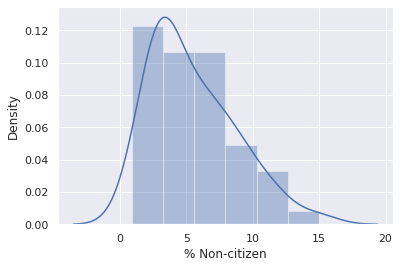

In [107]:
sns.distplot(df['% Non-citizen'])

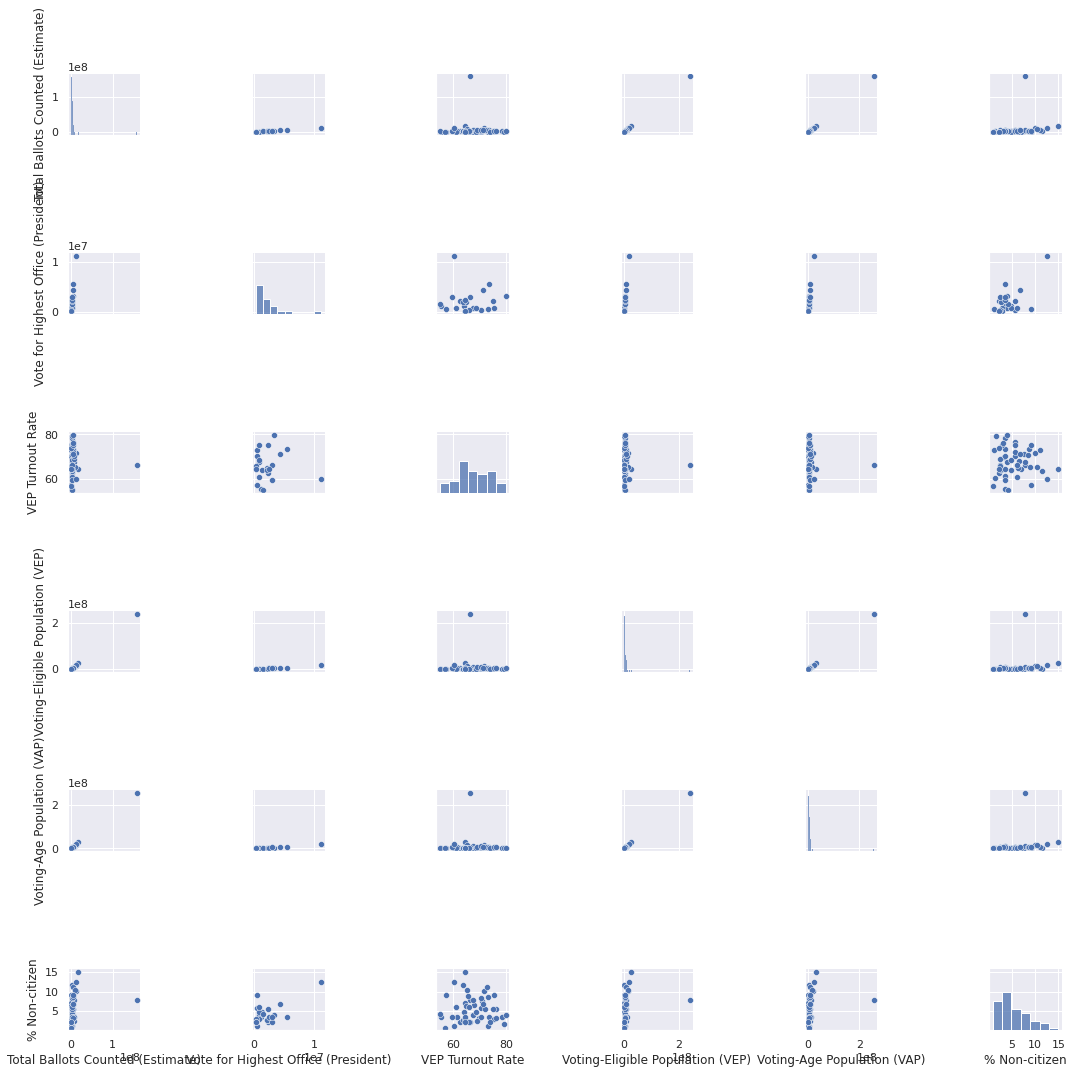

In [110]:
sns.pairplot(df_new)

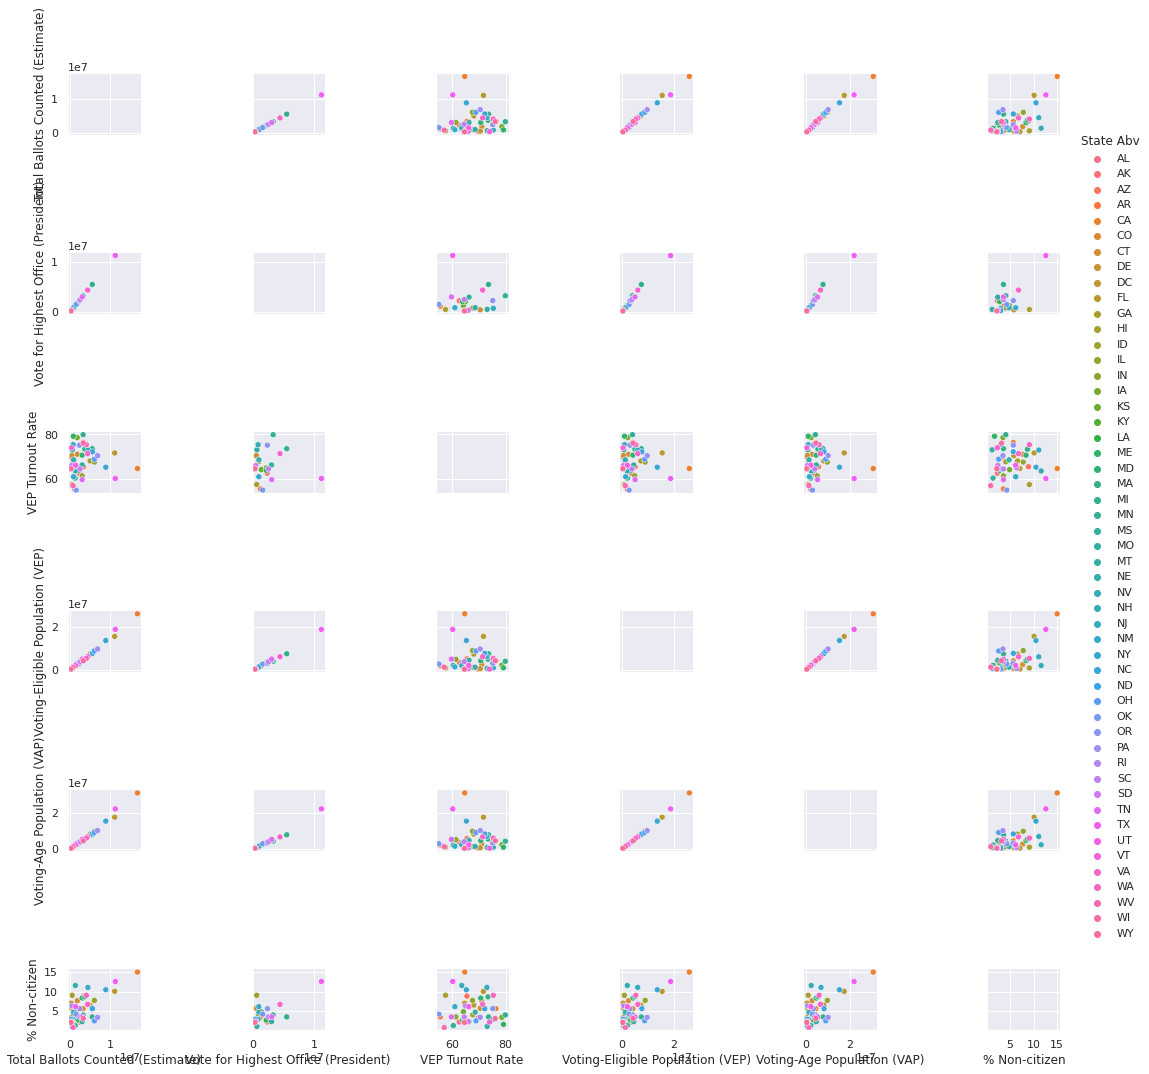

In [109]:
sns.pairplot(df_new, hue='State Abv')

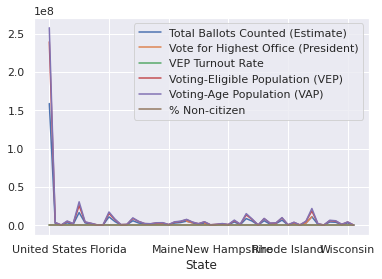

In [111]:
df_new.plot()

In [112]:
df_new.columns

Index(['Source', 'Total Ballots Counted (Estimate)',
       'Vote for Highest Office (President)', 'VEP Turnout Rate',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'State Abv'],
      dtype='object')

In [120]:
df_new.head()

,Source,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv
State,,,,,,,,
United States,NaN,158835004,NaN,66.4,239247182,257605088,7.8,NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,2306587,2297295.0,62.6,3683055,3837540,2.3,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,367000,NaN,69.8,525568,551117,3.4,AK
Arizona,https://results.arizona.vote/#/featured/18/0,3400000,NaN,65.5,5189000,5798473,8.9,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,1212030,1206697.0,55.5,2182375,2331171,3.6,AR


In [126]:
# prepare a sunburst figure
fig = px.sunburst(df_new, path=['Vote for Highest Office (President)', 
                            'Voting-Eligible Population (VEP)', '% Non-citizen'], values='Voting-Age Population (VAP)',
                   color='Total Ballots Counted (Estimate)', hover_data=['State Abv'],
                   color_continuous_scale='twilight',
                   color_continuous_midpoint=np.average(df_new['Total Ballots Counted (Estimate)'], weights=df_new['Voting-Age Population (VAP)']))

ValueError: ignored